In [98]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
sympy     : 1.5.1
matplotlib: 3.1.2
numpy     : 1.17.4



# Notebook para Análisis Matemático 2

La idea es ir agregándole herramientas a medida que se vayan aprendiendo. Más que nada es para ahorrarte o corroborar algunas cuentas.

Primero importamos las librerías que vamos a usar. La idea de esto es decirle a python que se tenga a mano algunas herramientas:

* SymPy: Es la que nos deja hacer cálculo simbólico. Con simbolitos.
* Matplotlib: Es la que nos deja hacer gráficos. Llamamos en particular a pyplot porque es la que se usar y la más usada en general.
* NumPy: Es una que te permite hacer cuentas grandes de manera súper optimizada. Clave para cálculo numérico.

In [85]:
import sympy as smp
import matplotlib.pyplot as plt
import numpy as np

## Extremos con restricciones 

Lo primero que hacemos es definir las cosas correctamente según Sympy

* Las variables las llamamos en una línea y las funciones en otra. 
* Las últimas tienen que tener el argumento cls=smp.Function. 
* Le decimos las variables de las que dependen.

Si querés podés agregar más funciones o variables acordándote de seguir el formato anterior.

In [99]:
# Esto es un comentario. No se corre lo que le sigue al numeral y no afecta en nada al resto.
x,y,l = smp.symbols(r'x y \lambda', real=True)  # Fijate que puse r' ...' eso es para que me tome la letra griega lambda.
f, g = smp.symbols('f g', real=True, cls=smp.Function)
f = f(x,y); g=g(x,y)
l

\lambda

In [87]:
f = 2*x**2 + y**4
g = x**2 + 2*y**2 - 8

In [88]:
g

x**2 + 2*y**2 - 8

In [89]:
var = [x,y]
grad_f = [smp.diff(f, u) for u in var]
grad_g = [smp.diff(g, u) for u in var]
grad_f

[4*x, 4*y**3]

In [51]:
hess_f = smp.MutableDenseMatrix([[smp.Rational(1,2)*smp.diff(grad_f[i], u) for u in var] for i in [0,1]])
hess_f

Matrix([
[2,      0],
[0, 6*y**2]])

In [52]:
hess_f.eigenvects()

[(2,
  1,
  [Matrix([
   [1],
   [0]])]),
 (6*y**2,
  1,
  [Matrix([
   [0],
   [1]])])]

In [53]:
grad_f_menos_lambda_grad_g = [grad_f[i] - l*grad_g[i] for i in [0,1]]
sols = smp.solve(grad_f_menos_lambda_grad_g, (x,y))

In [54]:
sols

[(0, 0), (0, -sqrt(\lambda)), (0, sqrt(\lambda))]

In [55]:
grad_f_menos_lambda_grad_g[0]

-2*\lambda*x + 4*x

In [56]:
grad_f_menos_lambda_grad_g[1]

-4*\lambda*y + 4*y**3

In [57]:
l_xsol = smp.solve(grad_f_menos_lambda_grad_g[0], l)
l_ysol = smp.solve(grad_f_menos_lambda_grad_g[1], l)

In [58]:
l_xsol

[2]

In [59]:
l_ysol

[y**2]

In [63]:
lagrange

[-2*\lambda*x + 4*x, -4*\lambda*y + 4*y**3, x**2 + 2*y**2 - 8]

In [60]:
lagrange = [grad_f[i] - l*grad_g[i] for i in [0,1]]
lagrange.append(g)
lagr_sols = smp.solve(lagrange, (x,y,l))

In [64]:
lagr_sols

[(-2, -sqrt(2), 2),
 (-2, sqrt(2), 2),
 (0, -2, 4),
 (0, 2, 4),
 (2, -sqrt(2), 2),
 (2, sqrt(2), 2),
 (-2*sqrt(2), 0, 2),
 (2*sqrt(2), 0, 2)]

In [65]:
variables = [x,y,l]
for j in range(8):
    print('x', j)
    print(grad_f_menos_lambda_grad_g[0].subs([(variables[i],lagr_sols[j][i]) for i in [0,1,2]]))
    print('y')
    print(grad_f_menos_lambda_grad_g[1].subs([(variables[i],lagr_sols[j][i]) for i in [0,1,2]]))

x 0
0
y
0
x 1
0
y
0
x 2
0
y
0
x 3
0
y
0
x 4
0
y
0
x 5
0
y
0
x 6
0
y
0
x 7
0
y
0


In [38]:
grad_f_menos_lambda_grad_g[0].subs([(l,2),(y,0)])

0

In [66]:
x_de_g = smp.sqrt(8-y**2)
x_de_g

sqrt(8 - y**2)

In [82]:
f_restr = f.subs(x,x_de_g)
f_restr_n = smp.lambdify(y, f_restr)
f_restr

y**4 - 2*y**2 + 16

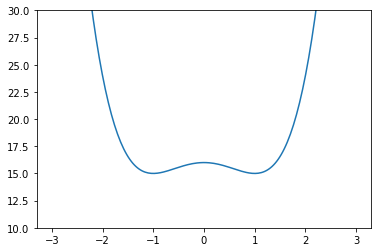

In [81]:
dom = np.linspace(-3, 3, 200)
plt.plot(dom, f_restr_n(dom))
plt.ylim(10, 30)
plt.show()

In [83]:
grad_f_restr = smp.diff(f_restr, y)

In [84]:
smp.solve(grad_f_restr, y)

[-1, 0, 1]